### <p align="center">Titanic Survival Prediction</p>


In [134]:
import pandas as p

In [113]:
train = p.read_csv('train.csv')
test = p.read_csv('test.csv')
passengerid = test['PassengerId']

In [ ]:
print(train.columns.tolist())


In [ ]:
train.head() # Gives the first 5 rows of the dataset
train.shape # (891, 12)
train.isnull().sum()

In [ ]:
test.shape # (418, 11)
test.isnull().sum()

In [117]:
train = train.drop(columns=['Name', 'Cabin'])
test = test.drop(columns=['Name', 'Cabin'])

In [ ]:
train_age_mean = train['Age'].mean()
test_age_mean = test['Age'].mean()
train['Age'].fillna(train_age_mean, inplace=True)
test['Age'].fillna(test_age_mean, inplace=True)

In [ ]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [120]:
train.drop(columns='PassengerId', inplace=True)
test.drop(columns='PassengerId', inplace=True)

<Axes: xlabel='Pclass', ylabel='Count'>

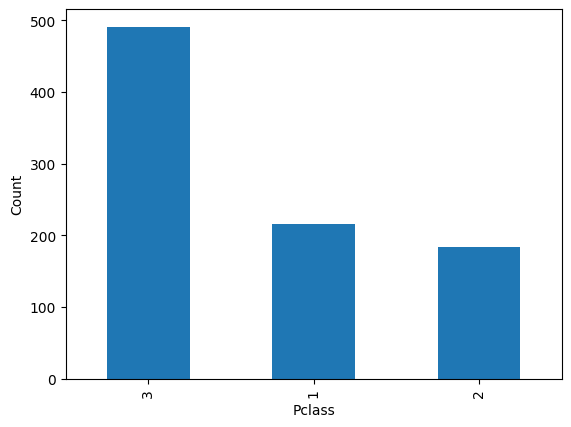

In [121]:
#EDA
Pclass_count = train.Pclass.value_counts()
Pclass_count.plot(kind='bar', xlabel='Pclass', ylabel='Count')

<Axes: xlabel='Sex', ylabel='Count'>

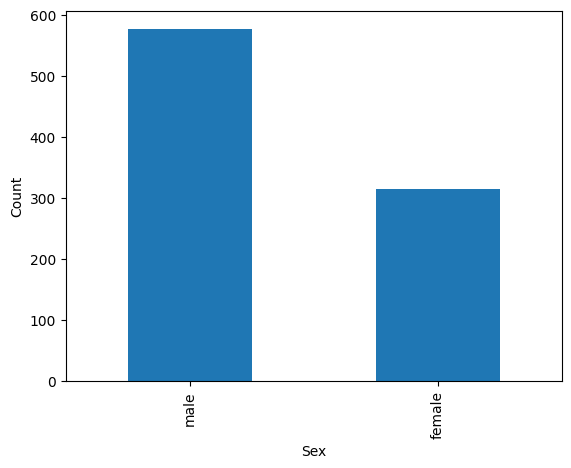

In [122]:
sex_count = train.Sex.value_counts()
sex_count.plot(kind='bar', xlabel='Sex', ylabel='Count')

<Axes: xlabel='Survived', ylabel='Count'>

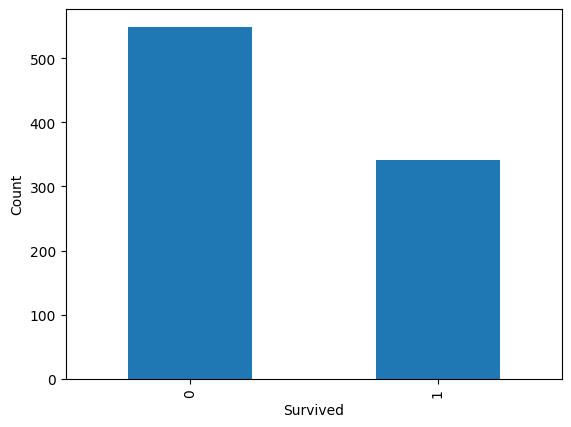

In [123]:
Survived_count = train.Survived.value_counts()
Survived_count.plot(kind='bar', xlabel='Survived', ylabel='Count')

<Axes: xlabel='Sex', ylabel='count'>

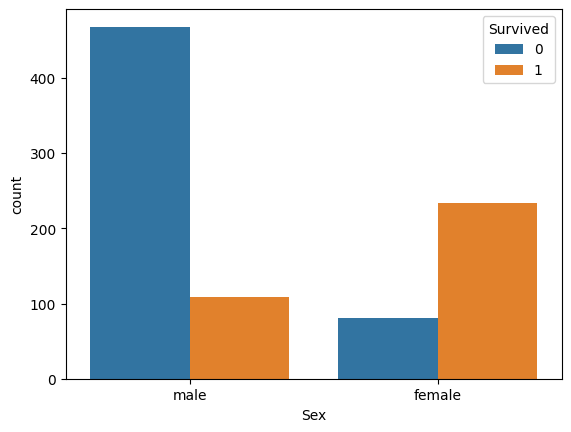

In [124]:
import seaborn as s
s.countplot(train, x='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

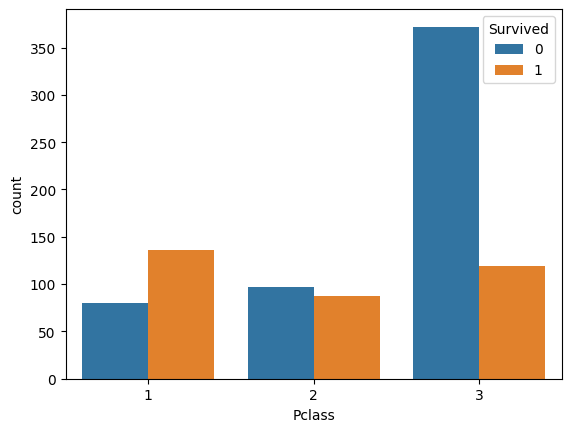

In [125]:
s.countplot(train, x='Pclass', hue='Survived')

In [ ]:
train['Sex'].replace({'male':1, 'female': 0}, inplace=True)
test['Sex'].replace({'male':1, 'female': 0}, inplace=True)
train['Embarked'].replace({'S':2, 'C': 1, 'Q':0}, inplace=True)
test['Embarked'].replace({'S':2, 'C': 1, 'Q':0}, inplace=True)

In [ ]:
print(train.columns.tolist())


In [128]:
#drop Ticket column as it is not useful for prediction
train.drop(columns='Ticket', inplace=True)
test.drop(columns='Ticket', inplace=True)

In [129]:
#split the train set into features and labels.
y = train.Survived.copy()
X = train.drop(columns='Survived').copy()

In [130]:
#split this further into training and testing sets.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=786)

In [131]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
dtc_prediction = dtc.predict(Xtest)
from sklearn.metrics import accuracy_score
dtc_score = accuracy_score(ytest, dtc_prediction)
dtc_score # 0.7486033519553073 (74% Not bad)

0.7486033519553073

In [132]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=15)
rfc.fit(Xtrain, ytrain)
rfc_prediction = rfc.predict(Xtest)
rfc_score = accuracy_score(ytest, rfc_prediction)
rfc_score # 0.7932960893854749

0.7877094972067039

In [133]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
lr_prediction = lr.predict(Xtest)
lr_score = accuracy_score(ytest, lr_prediction)
lr_score

0.7374301675977654